In [1]:
setwd(Sys.getenv("HOME"))

In [2]:
source("R_func/mutate_load.R")
source("R_func/future_load.R")

In [3]:
source("R_func/seurat_load.R")

Attaching SeuratObject

qs v0.25.4.



In [4]:
source("R_func/seurat/my.gen.multicolors.R")

In [5]:
library(tibble)
library(tidyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract




In [6]:
library(ggplot2)

# Load

In [7]:
# load("project/multiomics/PlotFig/Compare_corr/human_mouse_corr.rda")

In [8]:
hs.cor <- fread(
    "project/multiomics/PlotFig/Compare_corr/corr_data/human_cor_mtx.csv"
)

In [9]:
mq.cor <- fread(
    "project/multiomics/PlotFig/Compare_corr/corr_data/macaque_cor_mtx.csv"
)

In [10]:
mm.cor <- fread(
    "project/multiomics/PlotFig/Compare_corr/corr_data/mouse_cor_mtx.csv"
)

# Merge

In [11]:
my.pivot_longer <- function(mtx) {
    all.columns <- colnames(mtx)
    all.columns <- all.columns[all.columns != 'V1']
    mtx %<>% pivot_longer(cols = all_of(all.columns))
    colnames(mtx) <- c("pair", "group", "corr")
    return(mtx)
}

In [12]:
cor.list <- list(
    'Human' = hs.cor, 'Macaque' = mq.cor, 'Mouse'=mm.cor
)

In [13]:
merge.cor <- cor.list %>%
    lapply(my.pivot_longer) %>%
    bind_rows(.id='species')

In [14]:
ind <- merge.cor$'corr' %>% is.na

In [15]:
merge.cor[ind, ]

species,pair,group,corr
<chr>,<chr>,<chr>,<dbl>
Mouse,VIS-ACC,L6 IT Car3,NA
Mouse,ACC-PFC,L6 IT Car3,NA
Mouse,ACC-M1C,L6 IT Car3,NA


In [16]:
merge.cor <- merge.cor[!ind, ]

## format

In [17]:
merge.cor$'group' %>% unique %>% sort

[1] "Astro"      "L2-3 IT"    "L4 IT"      "L5 IT"      "L5-6 NP"   
 [6] "L6 CT"      "L6 IT"      "L6 IT Car3" "L6b"        "Micro"     
[11] "Non-VIP"    "Oligo"      "OPC"        "PVALB"      "SST"       
[16] "VIP"

In [18]:
group.levels <- c(
    'L2-3 IT', 'L4 IT', "L5 IT", "L6 IT", "L6 IT Car3",
    'L5-6 NP', 'L6 CT', 'L6b',
    'Non-VIP', 'VIP', 'PVALB', 'SST',
    'Astro', 'Oligo', 'OPC', 'Micro'
)

In [19]:
all(merge.cor$'group' %in% group.levels)

[1] TRUE

In [20]:
pair.levels <- c(
    'M1C-PFC', 'VIS-PFC', 'VIS-M1C', 'VIS-ACC',
    'ACC-PFC', 'ACC-M1C'
)

In [21]:
all(merge.cor$'pair' %in% pair.levels)

[1] TRUE

In [22]:
species.levels <- c(
    'Macaque', 'Human', 'Mouse'
)

In [23]:
all(merge.cor$'species' %in% species.levels)

[1] TRUE

In [24]:
merge.cor %<>% mutate(
    species = factor(species, species.levels),
    pair = factor(pair, pair.levels),
    group = factor(group, group.levels)
)

In [25]:
merge.cor$'score' <- 1 - merge.cor$'corr'

In [26]:
merge.cor %>% head

species,pair,group,corr,score
<fct>,<fct>,<fct>,<dbl>,<dbl>
Human,VIS-PFC,L5 IT,0.9639559,0.03604408
Human,VIS-PFC,L4 IT,0.8889821,0.11101792
Human,VIS-PFC,L2-3 IT,0.9529626,0.04703743
Human,VIS-PFC,L6 IT Car3,0.9424644,0.05753563
Human,VIS-PFC,L6 IT,0.9533112,0.04668883
Human,VIS-PFC,L6 CT,0.9274111,0.07258888


# draw

In [27]:
plot.data <- merge.cor

In [41]:
hplot <- ggplot(plot.data, aes(x=species, y=pair, fill=score))+
    geom_tile(colour="white") +
    cowplot::theme_cowplot() +
    labs(title = 'correlation between cortex region', x=NULL, y=NULL) +
    theme(
        axis.title.y = element_text(margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.title.x = element_text(margin = margin(t = 5, r = 0, b = , l = 0)),
        plot.title = element_text(margin = margin(t = 0, r = 0, b = 5, l = 0), hjust = 0.5)
    ) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    theme(axis.text.x = element_text(size=6)) +
    theme(axis.text.y = element_text(size=6)) +
    theme(axis.title.x = element_text(size=8)) +
    theme(axis.title.y = element_text(size=8)) +
    theme(plot.title = element_text(size=8)) +
    theme(legend.text=element_text(size=6)) +
    theme(legend.title=element_text(size=8)) +
    theme(
        legend.key.height= unit(0.3,'cm'),
        legend.key.width= unit(0.2,'cm'),
    ) +
    scale_fill_continuous(type = "viridis", name="1-corr") +
    # scale_fill_binned(type = "viridis", name="1-corr", n.breaks=6) +
    facet_grid(
        ~group, scales = "free_x", space = "free_x", switch = "x"
    ) +
    theme(strip.text = element_text(size=6))

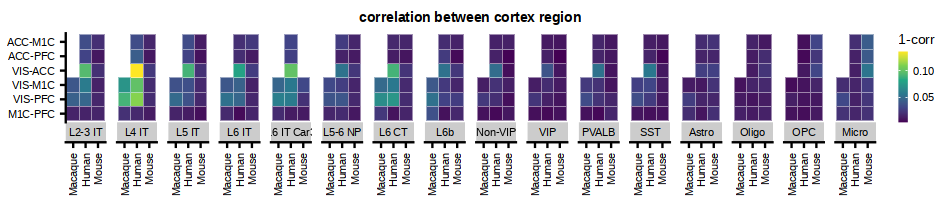

In [43]:
w <- 20
h <- 4.3
my.plot.size(w, h, unit='cm')
hplot

In [44]:
pdf(
    "project/multiomics/PlotFig/Compare_corr/spe_corr.pdf",
    width=unit(w/2.54, 'cm'), height=unit(h/2.54, 'cm')
)
hplot
dev.off()

png 
  2